<a href="https://colab.research.google.com/github/SeoulTechPSE/EngMath/blob/master/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title preliminaries for colab
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
    display(HTML("<script src='https://www.gstatic.com/external_hosted/"
                 "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

# Chapter 4. The Laplace Transform

### Contents

* Definition of the Laplace Transform
* The Inverse Transform and Transforms of Derivatives
* Translation Theorems
* Additional Operational Properties
* The Dirac Delta Function
* Systems of Linear Differential Equations

##  4.1 Definition of the Laplace Transform

* If $f$ be a function defined for $t \geq 0$, then the *integral*

 $\displaystyle\mathcal{L}\{f(t)\} =\int_0^\infty f(t) e^{-st}\, dt =F(s)$

 is the **Laplace Transform** of $f$ provided the integral converges. The result is a function of $s$
 
 **Example:** $\text{ }$ Evaluate $\mathcal{L}\{1\}$, $\mathcal{L}\{t\}$, and $\mathcal{L}\{e^{-3t}\}$
 
 **Example:** $\text{ }$ Evaluate $\mathcal{L}\{f(t)\}$ for $\displaystyle f(t) = \left\{\begin{matrix}
0, & 0 \leq  t < 3\\ 
2, & \;\;\;\;\;t \geq 3
\end{matrix}\right.$

In [2]:
import sympy
from sympy import init_printing
from sympy.integrals.transforms import laplace_transform, inverse_laplace_transform
init_printing(use_unicode=True)

s, t = sympy.symbols('s t')

In [3]:
laplace_transform(1, t, s)[0]

In [4]:
laplace_transform(t, t, s)[0]

In [5]:
laplace_transform(sympy.exp(-3*t), t, s)[0]

In [6]:
laplace_transform(2*sympy.Heaviside(t -3), t, s)[0]

* $\mathcal{L}$ is a linear transform

  $\mathcal{L}\{\alpha f(t) +\beta g(t)\} = \alpha \mathcal{L} \{f(t)\} +\beta\mathcal{L}\{g(t)\} =\alpha F(s) +\beta G(s)$
  
  **Example:** $\text{ }$ Find $\mathcal{L}\{f(t)\}$ by first using an appropriate trigonometric identity $f(t)=\sin 2t \cos 2t$

In [7]:
f = (sympy.sin(2*t)*sympy.cos(2*t)).simplify()
f

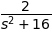

In [8]:
laplace_transform(f, t, s)[0]

### Exercises 4.1

* 1, 3, 5
* 11, 16, 17
* 41, 42

## 4.2 The Inverse Transform and Transforms of Derivatives

* If $F(s)$ represents the Laplace transform of a function $f(t)$, then $f(t)$ is the **inverse Laplace transform** of $F(s)$

  $f(t)=\mathcal{L}^{-1}\{F(s)\}$
  
* $\mathcal{L}^{-1}$ is a linear transform

  $\mathcal{L}^{-1}\{\alpha F(s) +\beta G(s)\} = \alpha \mathcal{L}^{-1} \{F(s)\} +\beta\mathcal{L}^{-1}\{G(s)\} =\alpha f(t) +\beta g(t)$
  
  **Example:** $\text{ }$ Evaluate $\displaystyle\mathcal{L}^{-1}\left\{\frac{-2s +6}{s^2 +4}\right\}$

In [9]:
f = (-2*s +6)/(s**2 +4)
inverse_laplace_transform(f, s, t) # theta(t) - unit step function

* **Transforms of derivatives**

  $
  \begin{align*}
    \mathcal{L}\{f'(t)\} &= sF(s) -f(0)\\ 
    \mathcal{L}\{f''(t)\} &= s^2F(s) -sf(0) -f'(0)\\ 
    &\; \vdots  
  \end{align*}
  $
  
  $\displaystyle\mathcal{L}\left\{\frac{d^n y}{dt^n}\right\}$ depends on $Y(s)=\mathcal{L}\{y(t)\}$ and the $n-1$ derivatives of $y(t)$ evaluated at $t=0$
  
* If $f$ is piecewise continuous on $[0, \infty]$ and of exponential order, then

  $\displaystyle\lim_{s \to \infty} \mathcal{L}\{f(t)\}=0$

* The Laplace transform of a linear DE with constant coefficients becomes an algebraic equation in $Y(s)$

  **Example:** $\text{ }$ Use the Laplace transform to solve the IVP
  
  $\displaystyle\frac{dy}{dt} +3y = 13\sin 2t, \;y(0)=6$

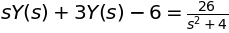

In [10]:
Y = sympy.Function('Y')(s)

eqn = sympy.Eq((s*Y -6) +3*Y, 13*laplace_transform(sympy.sin(2*t), t, s)[0])
eqn

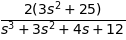

In [11]:
Yofs = sympy.solve(eqn, Y)
Yofs[0]

In [12]:
soln = inverse_laplace_transform(Yofs[0], s, t)
soln.simplify()

### Exercises 4.2

* 1, 3, 5, 14, 16
* 39, 41

## 4.3 Translation Theorems

* **First Translation Theorem**

  If $\mathcal{L}\{f(t)\}=F(s)$ and $a$ ia any real number, then 
  
  $\mathcal{L}\{e^{-at}f(t)\}=F(s+a)$
  
  **Example:** $\text{ }$ Evaluate $\mathcal{L}\{e^{-2t}\cos 4t\}$ and $\displaystyle\mathcal{L}^{-1}\left\{\frac{2s +5}{(s +3)^2}\right\}$

* **Second Translation Theorem**

  If $\mathcal{L}\{f(t)\}=F(s)$ and $a >0$, then 
  
  $\mathcal{L}\{f(t -a)\mathcal{U}(t -a)\}=e^{-as}F(s)$
  
  **Alternative Form**
  
  $\displaystyle\mathcal{L}\{g(t)\mathcal{U}(t -a)\}=\int_a^\infty e^{-st} g(t)\,dt=\int_0^\infty e^{-s(u+a)} g(u +a) \,du=e^{-as} \mathcal{L}\{g(t+a)\}$
  
  **Example:** $\text{ }$ Solve $y' +y = f(t)$, $y(0)=5$, where $f(t)=\left\{\begin{matrix}
\;\;\;\;\;\;\, 0, & 0 \leq t < \pi\\ 
3\cos t, & \;\;\;\;\;t \geq \pi
\end{matrix}\right.$

In [13]:
Y = sympy.Function('Y')(s)
F = laplace_transform(3*sympy.cos(t), t, s)[0] *laplace_transform(sympy.Heaviside(t -sympy.pi), t, s)[0]

Yofs = sympy.solve(sympy.Eq((s*Y -5) +Y, F), Y)
soln = inverse_laplace_transform(Yofs[0], s, t)
soln.simplify()

### Exercises 4.3

* 1, 4, 7, 17, 19
* 21, 23
* 37, 39, 43, 45
* 69, 70

## 4.4 Additional Operational Properties

* **Derivatives of Transforms:** $\text{ }$ If $F(s)=\mathcal{L}\{f(t)\}$ and $n=1,2,\cdots$, then

  $\displaystyle\mathcal{L}\{t^nf(t)\}=(-1)^n \frac{d^n}{ds^n} F(s)$
  
  **Example:** $\text{ }$ Evaluate $\mathcal{L}\{t\sin \omega t\}$
  
  **Example:** $\text{ }$ Solve $x'' +16x =\cos 4t, \; x(0)=1, \; x'(0)=1$

* **Convolution Theorem:** $\text{ }$ $\displaystyle f*g=\int_0^t f(\tau)g(t -\tau)\, d\tau$

  $\mathcal{L}\{f*g\}=\mathcal{L}\{f(t)\} \mathcal{L}\{g(t)\} =F(s) G(s)$
  
  **Example:** $\text{ }$ Evaluate $\displaystyle\mathcal{L}^{-1}\left\{\frac{1}{(s^2 +\omega^2)^2}\right\}$
  
  **Example:** $\text{ }$ Evaluate $\displaystyle\mathcal{L} \left\{ \int_0^t f(\tau)\, d\tau \right\}$
  
  **Example:** $\text{ }$ Solve $\displaystyle f(t) =3t^2 -e^{-t} -\int_0^t f(\tau)\, e^{t -\tau}\, d\tau\;$ for $f(t)$

* **Transform of a Periodic Function:** $\text{ }$ $f(t+T)=f(t)$

  $\displaystyle\mathcal{L}\{f(t)\}=\frac{1}{1-e^{-sT}} \int_0^T e^{-st} f(t) \,dt$
  
  **Example:** $\text{ }$ Find the Laplace transform of the periodic function
  
  ![Square wave](https://github.com/SeoulTechPSE/EngMath/blob/master/figures/ch04_figure01.png?raw=1)
  
  $\displaystyle\mathcal{L}\{E(t)\}=\frac{1}{1 -e^{-2s}} \int_0^2 e^{-st} E(t)\,dt=\frac{1}{s(1 +e^{-s})}$

### Exercises 4.4

* 1, 3, 7
* 9, 11
* 23, 25, 29
* 41, 50, 57, 63, 64
* 68, 69

## 4.5 The Dirac Delta Function

* **Unit Impulse** 
  
  $
  \delta_a(t-t_0) = \left\{\begin{matrix}
    0, & \;\;\;\;\;\; 0 \leq t < t_0 -a\\ 
    \frac{1}{2a}, & t_0 -a \leq t \leq t_0 +a\\ 
    0, & \;\; t \geq t_0 +a
  \end{matrix}\right.
  $
  
> <img src="https://github.com/SeoulTechPSE/EngMath/blob/master/figures/ch04_figure02.png?raw=1" width="200">

* **The Dirac Delta Function**

  $\displaystyle\delta(t -t_0)=\lim_{a \to 0} \,\delta_a(t -t_0)$
  
  $\displaystyle\mathcal{L}\{\delta(t -t_0)\}=\lim_{a \to 0} \mathcal{L}\{\delta_a(t -t_0)\}=e^{-st_0}\lim_{a \to 0} \left(\frac{e^{sa} -e^{-sa}}{2sa}\right)=e^{-st_0}$
  
  When $t_0=0$, $\displaystyle\mathcal{L}\{\delta(t)\}=1$
  
  **Example:** $\text{ }$ Solve $y'' +y=4\delta(t -2\pi)$ subject to $y(0)=1, \;y'(0)=0$

### Exercises 4.5

* 1, 3, 5

## 4.6 Systems of Linear Differential Equations

When initial conditions are specified, the Laplace transform reduces a system of linear DEs to a set of simultaneous algebraic equations in the transformed functions

**Example:** $\text{ } $ Double Pendulum

 >![Double pendulum](https://github.com/SeoulTechPSE/EngMath/blob/master/figures/ch04_figure03.png?raw=1)

 For small displacements $\theta_1$ and $\theta_2$,

 >$\begin{align*}
(m_1 +m_2) l_1 \ddot{\theta_1} +m_2 l_2 \ddot{\theta_2} +(m_1 +m_2) g \theta_1 &= 0\\ 
 l_2 \ddot{\theta_2} +l_1 \ddot{\theta_1} +g \theta_2 &= 0
\end{align*}$

Solve system when $m_1=3$, $m_2=1$, $l_1=l_2=16$, $\theta_1(0) = 1$, $\theta_2(0)=-1$, $\dot{\theta_1}(0)=0$, and $\dot{\theta_2}(0)=0$

### Exercises 4.6

* 1, 3, 5, 14